# Conservative Interpolants

## Quadratic polynomial:

We want to construct a quadratic polynomal through that points $x_{i-1}$, $x_i$, $x_{i+1}$ that gives the correct averages,
$f_{i+1}$, $f_i$, and $f_{i-1}$ when integrated over the volume, e.g.

$$\frac{1}{\Delta x} \int_{x_{i-1/2}}^{x_{i+1/2}} f(x) dx = f_i$$

There are 3 unknowns in the quadratic and three constraints, so this is a linear system we can solve.

In [1]:
# Importing libraries
import sympy as sp

# To see the outputs in latex format, we use:
from sympy.interactive import printing
printing.init_printing(use_latex = True)

In [2]:
# Define symbols

A, B, C, x, x0 = sp.symbols("A B C x x0")

# Quaratic equation
f_x = A*(x-x0)**2 + B*(x-x0) + C

display(f_x)

In [3]:
# Define symbol for delta_x

dx = sp.symbols("\Delta")

display(dx)

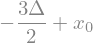

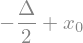

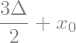

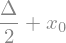

In [4]:
# Constraints:

fl, f0, fr = sp.symbols("f_{i-1} f_i f_{i+1}")

xl_32 = x0 - sp.Rational(3,2)*dx
xl_12 = x0 - sp.Rational(1,2)*dx

xr_32 = x0 + sp.Rational(3,2)*dx
xr_12 = x0 + sp.Rational(1,2)*dx

display(xl_32, xl_12, xr_32, xr_12)


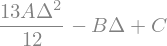

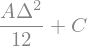

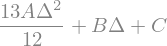

In [5]:
# Integrate

a = sp.simplify(sp.integrate(f_x/dx, (x, xl_32, xl_12)))
b = sp.simplify(sp.integrate(f_x/dx, (x, xl_12, xr_12)))
c = sp.simplify(sp.integrate(f_x/dx, (x, xr_12, xr_32)))
display(a, b, c)

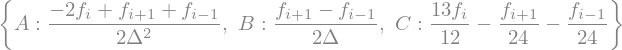

In [6]:
# Find the coefficients of the polynomial

coef_poly = sp.solve([a - fl, b - f0, c - fr], [A, B, C])

display(coef_poly)

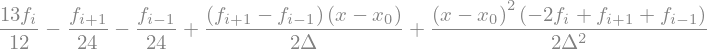

In [7]:
f_x.subs(A,coef_poly [A]).subs(B,coef_poly [B])\
.subs(C,coef_poly [C])

## Colella and Woodward PPM interpolator:

### Cubic

We want to construct a cubic polynomal through that points $x_{i-2}$, $x_{i-1}$, $x_i$, $x_{i+1}$ that gives the correct averages,
$f_{i-2}$, $f_{i-1}$, $f_i$, and $f_{i-1}$ when integrated over the volume of each zone

In [8]:
A, B, C, D = sp.symbols("A B C D")

f_x = A*(x-x0)**3 + B*(x-x0)**2 + C*(x-x0) + D
display(f_x)

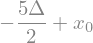

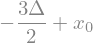

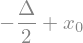

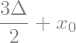

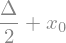

In [9]:
# Constraints:

fll, fl, f0, fr = sp.symbols("f_{i-2} f_{i-1} f_i f_{i+1}")

xl_52 = x0 - sp.Rational(5,2)*dx
xl_32 = x0 - sp.Rational(3,2)*dx
xl_12 = x0 - sp.Rational(1,2)*dx

xr_32 = x0 + sp.Rational(3,2)*dx
xr_12 = x0 + sp.Rational(1,2)*dx

display(xl_52, xl_32, xl_12, xr_32, xr_12)

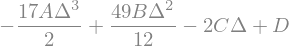

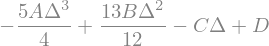

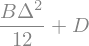

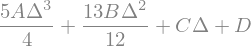

In [10]:
# Integrate

a = sp.simplify(sp.integrate(f_x/dx, (x, xl_52, xl_32)))
b = sp.simplify(sp.integrate(f_x/dx, (x, xl_32, xl_12)))
c = sp.simplify(sp.integrate(f_x/dx, (x, xl_12, xr_12)))
d = sp.simplify(sp.integrate(f_x/dx, (x, xr_12, xr_32)))

display(a, b, c, d)

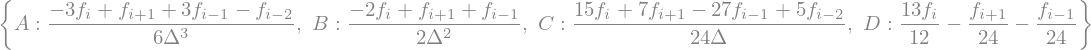

In [11]:
# Find the coefficients of the polynomial

coef_poly = sp.solve([a - fll, b - fl, c - f0, d - fr], [A, B, C, D])

display(coef_poly)

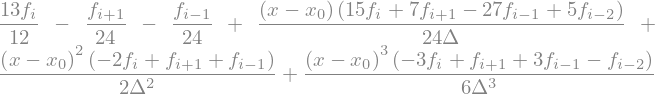

In [12]:
f_poly3 = f_x.subs(A,coef_poly [A]).subs(B,coef_poly [B])\
.subs(C,coef_poly [C]).subs(D,coef_poly [D])

display(f_poly3)

This interpolant is symmetric about the $i-\frac{1}{2}$ interface:

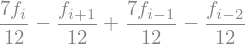

In [13]:
f_poly3.subs(x, x0 - sp.Rational(1,2)*dx)

This is the interpolating polynomial used to find the interface states in PPM (Colella & Woodward 1984).

### Reference paper:

https://crd.lbl.gov/assets/pubs_presos/AMCS/ANAG/A141984.pdf